# Project

**Code Implementation: Performances between K-Nearest Neighbors and Logistic Regression**

**k-NN Algorithm**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



In [2]:
# Load dataset: Iris
iris = datasets.load_iris()
#print(iris)

In [3]:
# We choose the target class as our label with three different types of plants
X = iris['data'][:,2:] # Pental width and length (features)
y = iris['target']
#y

# Train test split the data 
# and stratify the target label to keep the same ratio in test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y) # 80% training, 20% testing

# Data scaling
Scaler = StandardScaler()

X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)



In [4]:
# Train the classifier with k = 3, using Euclidean distance metric
# Fit the data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred



array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

In [6]:
# Creating confusion matrix and accuracy score to test the performance
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('Confusion Matrix: \n', cm)
print('Accuracy score: ', round(acc, 4))



Confusion Matrix: 
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Accuracy score:  0.9667


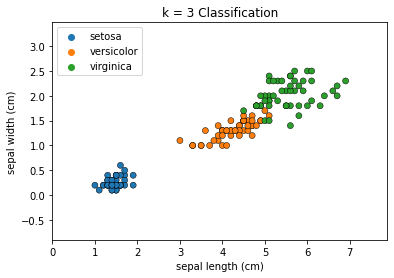

In [7]:
# Plot the data
s = 0.02 # step size in meshgrid function

clf =  neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# Plot the decision boundary with meshgrid function
X_min, X_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(X_min, X_max, s), np.arange(y_min, y_max, s))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Scatterplot of training data
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=iris.target_names[y],
    alpha=1.0,
    edgecolor="black",
    )
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k = 3 Classification")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()



**Find the best k**

In [8]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1, stratify=y)

accuracy = []

# Given multiple numbers of k
for k in [3,5,7,9,11,13,15]:
  clf = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean') # Euclidean method
  clf.fit(X_train, y_train)
  
  y_pred = clf.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))

print(accuracy)

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]


**Logistic Regression**

In [12]:
# In this case, we will use the same dataset as well
iris = datasets.load_iris()

# Binary classification
X = iris['data'][:,2:]
y = (iris['target'] == 2).astype(int) # If Iris = Virginica, else 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Data scaling
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

# Fit the data
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('Logistic Regression: \n')
print('Accuracy is: ', round(acc, 4))
print('Confusion matrix is: \n', cm)



Logistic Regression: 

Accuracy is:  1.0
Confusion matrix is: 
 [[24  0]
 [ 0  6]]


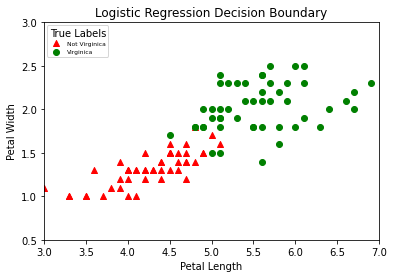

In [32]:
# Plot the Logistic Regression
# We need to get the model parameters
p = log_reg.intercept_[0]
wi, wj = log_reg.coef_.T # Transpose the coefficient

# Find the gradient and intercept of the decision boundary
c = -p/ wj
m = -wi/ wj

# Classify the data with the decision boundary
xmin, xmax = 3, 7
ymin, ymax = 0.5, 3
xdb = np.array([xmin, xmax])
ydb = m * xdb + c


# Separate observations in two groups: Is Iris and is not Iris
X_iris = X[[i for i in range(len(y)) if y[i] == 1],:]
X_not_iris = X[[i for i in range(len(y)) if y[i] == 0],:]

# Make scatterplots
not_iris = plt.scatter(X_not_iris[:,0], X_not_iris[:,1], marker='^', color='r')
is_iris = plt.scatter(X_iris[:,0], X_iris[:,1], marker='o', color='g')

# Adjust and generate legend
plt.legend((not_iris, is_iris),
           ('Not Virginica', 'Virginica'),
           title='True Labels',
           loc = 'upper left',
           scatterpoints=1,
           fontsize=6)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Logistic Regression Decision Boundary")
plt.xlim([3,7])
plt.ylim([0.5,3])
plt.show()



**k-Means**

In [34]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
!pip install kneed
from kneed import KneeLocator, DataGenerator as dg

# Import dataset and create feature column
data = np.genfromtxt('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt') # txt format

#data

feature_columns = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel',
                   'Asymmetry coefficient', 'Length of kernal groove']

df = pd.DataFrame(data, columns = feature_columns + ['Class'])

df
#df.describe()



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernal groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [42]:
# KMeans cluster for k range = 1 to 8. Find the best k.
# Reshape and select required data
X = df.iloc[:, :-1]
y = df.iloc[:, -1] -1 # Change [1,2,3] to [0,1,2] to fit the data format

y = np.array(y)
y = np.reshape(y, [len(y), 1]) # Reshape y into scalable format

# Data scaling
Scaler = StandardScaler()
X = Scaler.fit_transform(X)
X, y = shuffle(X, y, random_state=0)

# The maximum k is 8
max_k = 8
sse = []

# KNN neighbors classifier plot function
def knee_plot(X, k_max):
  for k in range(1, k_max+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)

    sse.append(kmeans.inertia_) # The lower the inertia, the better the model

knee_plot(X, max_k)

best_k = KneeLocator(x=range(1, max_k+1), y=sse, curve='convex', 
                         direction='decreasing').knee

print('The best of k is:', best_k)


The best of k is: 3


Text(0.5, 1.0, 'Knee Point')

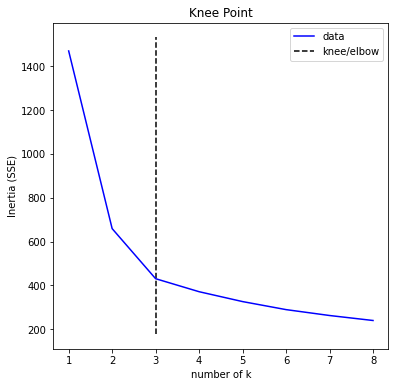

In [44]:
# Use knee method to find the knee/ elbow point of k
# Figure for finding the best of k
best_k_fig = KneeLocator(x=range(1, max_k+1), y=sse, curve='convex', 
                         direction='decreasing')

best_k_fig.plot_knee()
plt.xlabel('number of k')
plt.ylabel('Inertia (SSE)')
plt.title('Knee Point') # k = 3 will be the elbow point


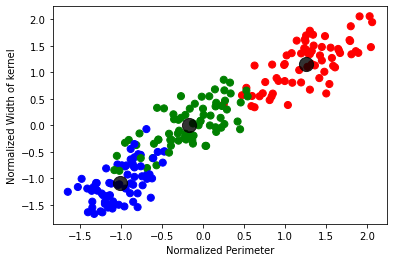

In [47]:
import random

# Re-run with best k clusters and pick two features fi, fj at random
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(X)
y_pred_k = kmeans.predict(X)

random.seed(1)
fi, fj = random.sample(list(range(0, len(X[0]))), 2) # Select two features randomly

colors = ['blue', 'red', 'green']
color_list = [colors[y] for y in y_pred_k] # Assign colors to features
plt.scatter(X[:, fi], X[:, fj], c = color_list, s = 50) # fi, fj as axis

# Make scatterplots
centers = kmeans.cluster_centers_ # Coordinates of the centers (Reassigned iteractively)
plt.scatter(centers[:, fi], centers[:, fj], c='black', s = 200, alpha = 0.8)
plt.xlabel('Normalized ' + feature_columns[fi])
plt.ylabel('Normalized ' + feature_columns[fj])
plt.show()